In [1]:
import yfinance as yf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tickers = ['RELIANCE.NS', 'INFY.NS', 'ICICIBANK.NS'] 
data = yf.download(tickers, start='2020-01-01', end='2025-05-31', interval='1mo')['Close'] 
returns = data.pct_change().dropna()
expected_returns=returns.mean()
standard_deviation=returns.std()
cov_matrix=returns.cov()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [3]:
def portfolio_sd(weights,cov_matrix,sd):
    variance=0
    for i in range(len(weights)):
        for j in range(len(weights)):
            wi = weights[i]
            wj = weights[j]
            ti = tickers[i]
            tj = tickers[j]
            cov_ij = cov_matrix.loc[ti, tj]

            variance += wi * wj * cov_ij
    return variance**0.5


In [4]:
weights=[[0.33,0.33,0.34],[0.35,0.35,0.3],[0.5,0.5,0],[0,0.5,0.5],[0.3,0.3,0.4]]
sharpe=[]
sd=[]
return_port=[]
risk_free=0.5
for i in weights:
    sd_temp=portfolio_sd(i,cov_matrix,standard_deviation)
    sd.append(sd_temp)
    return_temp = i[0]*expected_returns['ICICIBANK.NS'] + i[1]*expected_returns['INFY.NS'] + i[2]*expected_returns['RELIANCE.NS']
    return_port.append(return_temp)
    sharpe.append((return_temp-risk_free)/sd_temp)


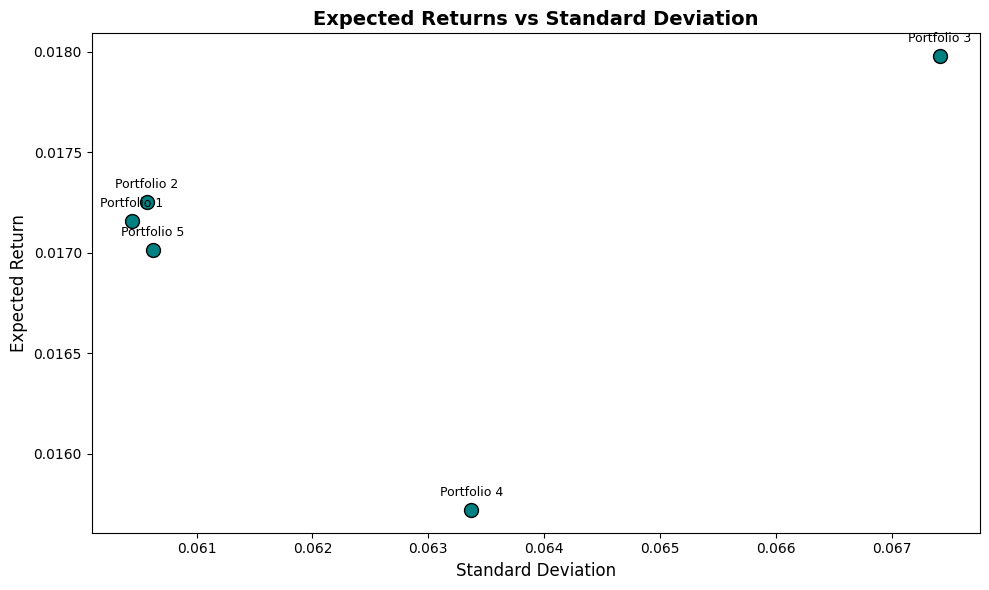

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(sd, return_port, c='teal', s=100, edgecolors='black')

for i, weight in enumerate(weights):
    label = f"Portfolio {i+1}"
    plt.annotate(label, (sd[i], return_port[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9)

plt.title("Expected Returns vs Standard Deviation", fontsize=14, fontweight='bold')
plt.xlabel("Standard Deviation", fontsize=12)
plt.ylabel("Expected Return", fontsize=12)

plt.tight_layout()
plt.show()
#minimum variance portfolio = portfolio 1

In [6]:
#identifying tangency portfolio and capital market line
max_sharpe_idx = np.argmax(sharpe)
tangency_weights = weights[max_sharpe_idx]
tangency_return = return_port[max_sharpe_idx]
tangency_sd = sd[max_sharpe_idx]
print(tangency_weights)

[0.5, 0.5, 0]
